## 3.基于VARMA回归模型的股票价格预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# 展示的结果最多输出10行,前五行后五行
pd.set_option('display.max_rows', 10)

import warnings
warnings.filterwarnings("ignore")

In [2]:
#读数据
data=pd.read_csv('data_stock2.csv',encoding='gbk')
#建立一个索引列
data.index = data.myTime
# 选取其中一些feature作为数据
data_all = data.loc["1960-07-01":"1977-10-01", ['lnDate1', 'lnDate2', 'lnDate3']]
print("======所有数据形状======")
print(data_all.shape)
# 前60个做训练集
data_train = data_all[0:60]
print("======样本数据形状======")
print(data_train.shape)

data_train

======所有数据形状======
(70, 3)
======样本数据形状======
(60, 3)


,lnDate1,lnDate2,lnDate3
myTime,,,
1960-07-01,0.045445,1.000000,0.823981
1960-10-01,0.111786,0.972014,0.832954
1961-01-01,0.074238,0.993996,0.843496
1961-04-01,0.000000,0.972568,0.788654
1961-07-01,0.026239,0.973104,0.793481
...,...,...,...
1974-04-01,0.368654,0.126045,0.000000
1974-07-01,0.457297,0.124603,0.065994
1974-10-01,0.519171,0.183588,0.153300


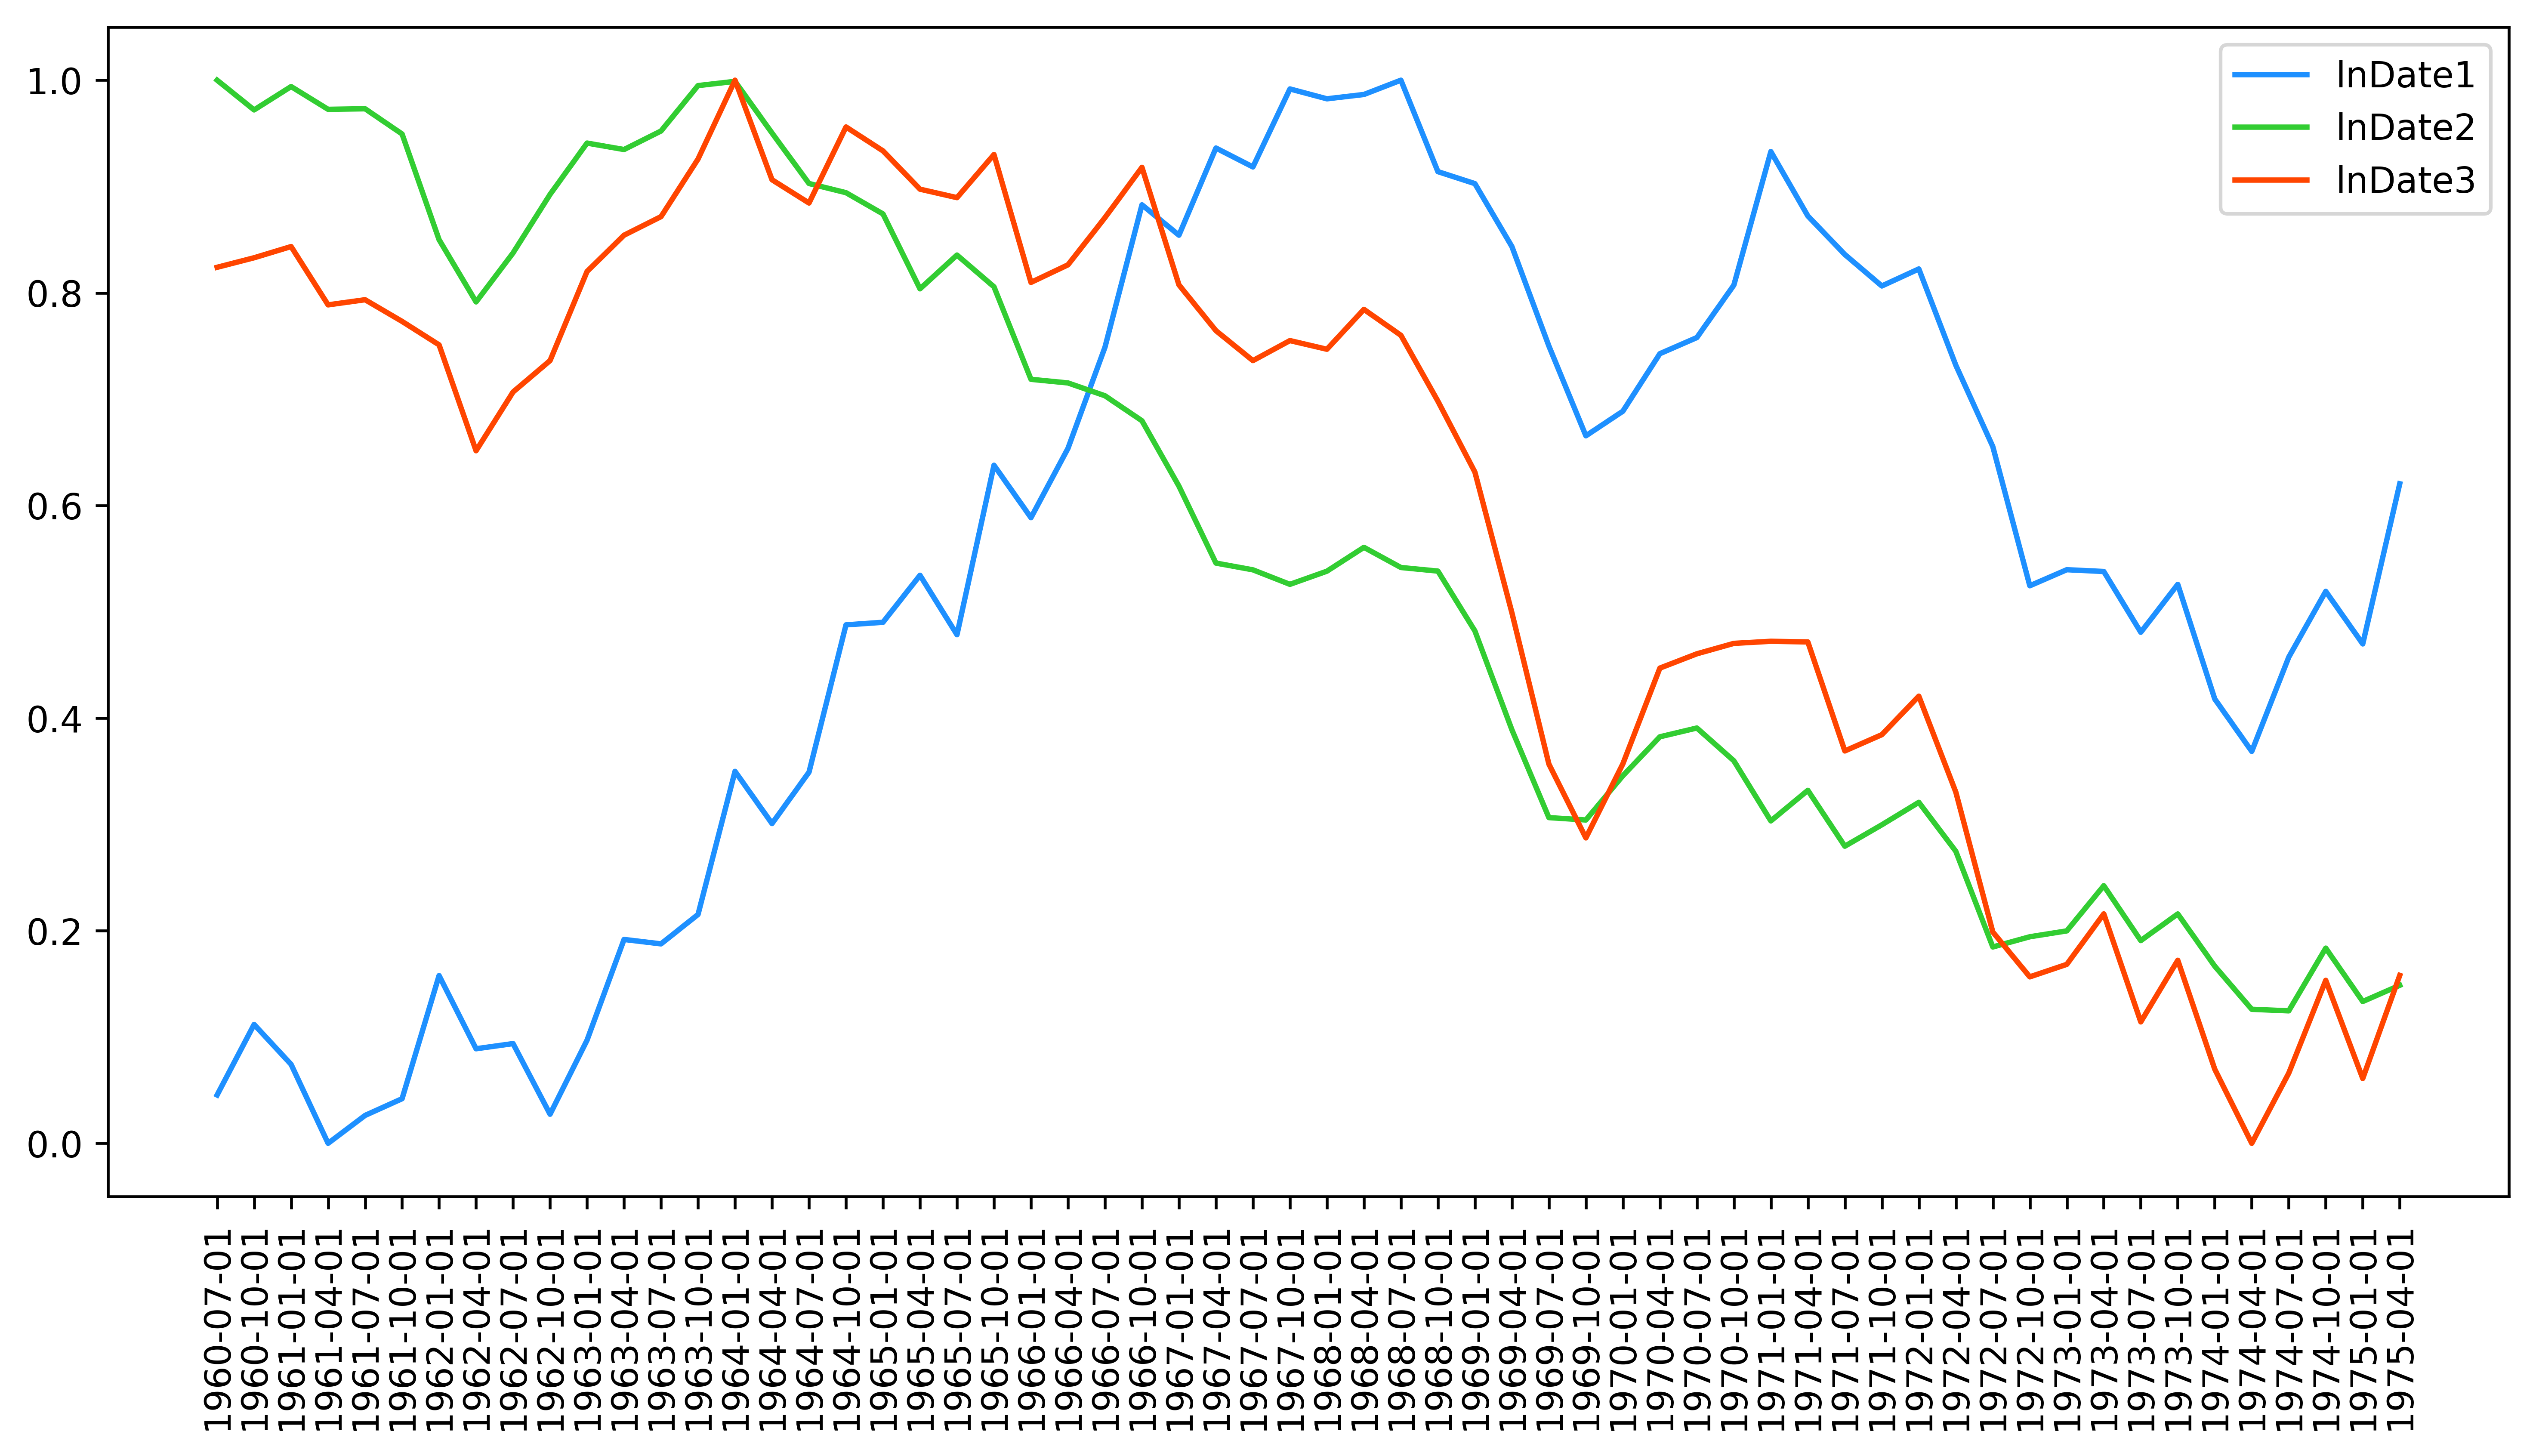

In [3]:
# 画个图，每个feature对应一条线，设定每个feature对应的颜色。
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train['lnDate1'],'dodgerblue',label='lnDate1')
plt.plot(data_train['lnDate2'],'limegreen',label='lnDate2')
plt.plot(data_train['lnDate3'],'orangered',label='lnDate3')
plt.legend()
plt.show()

In [4]:
# 做ADF检验，输出一下每个feature的P值，都大于0.05，说明都不平稳
from statsmodels.tsa.stattools import adfuller 
adf_result1 = adfuller(data_train['lnDate1'])
adf_result2 = adfuller(data_train['lnDate2'])
adf_result3 = adfuller(data_train['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.19341638466350114 0.8806961283442936 0.9147461773812955


In [5]:
# 做一阶差分处理
data_train_diff=data_train.diff(1)
data_train_diff=data_train_diff.dropna()
data_train_diff

,lnDate1,lnDate2,lnDate3
myTime,,,
1960-10-01,0.066342,-0.027986,0.008973
1961-01-01,-0.037548,0.021982,0.010542
1961-04-01,-0.074238,-0.021428,-0.054842
1961-07-01,0.026239,0.000535,0.004826
1961-10-01,0.015705,-0.023720,-0.020377
...,...,...,...
1974-04-01,-0.049278,-0.040556,-0.069696
1974-07-01,0.088643,-0.001442,0.065994
1974-10-01,0.061874,0.058986,0.087306


In [6]:
# 再进行ADF检验
adf_result1 = adfuller(data_train_diff['lnDate1'])
adf_result2 = adfuller(data_train_diff['lnDate2'])
adf_result3 = adfuller(data_train_diff['lnDate3'])
print(adf_result1[1],adf_result2[1],adf_result3[1])

0.13617139745626772 4.0613672589027086e-08 4.67935863203642e-09


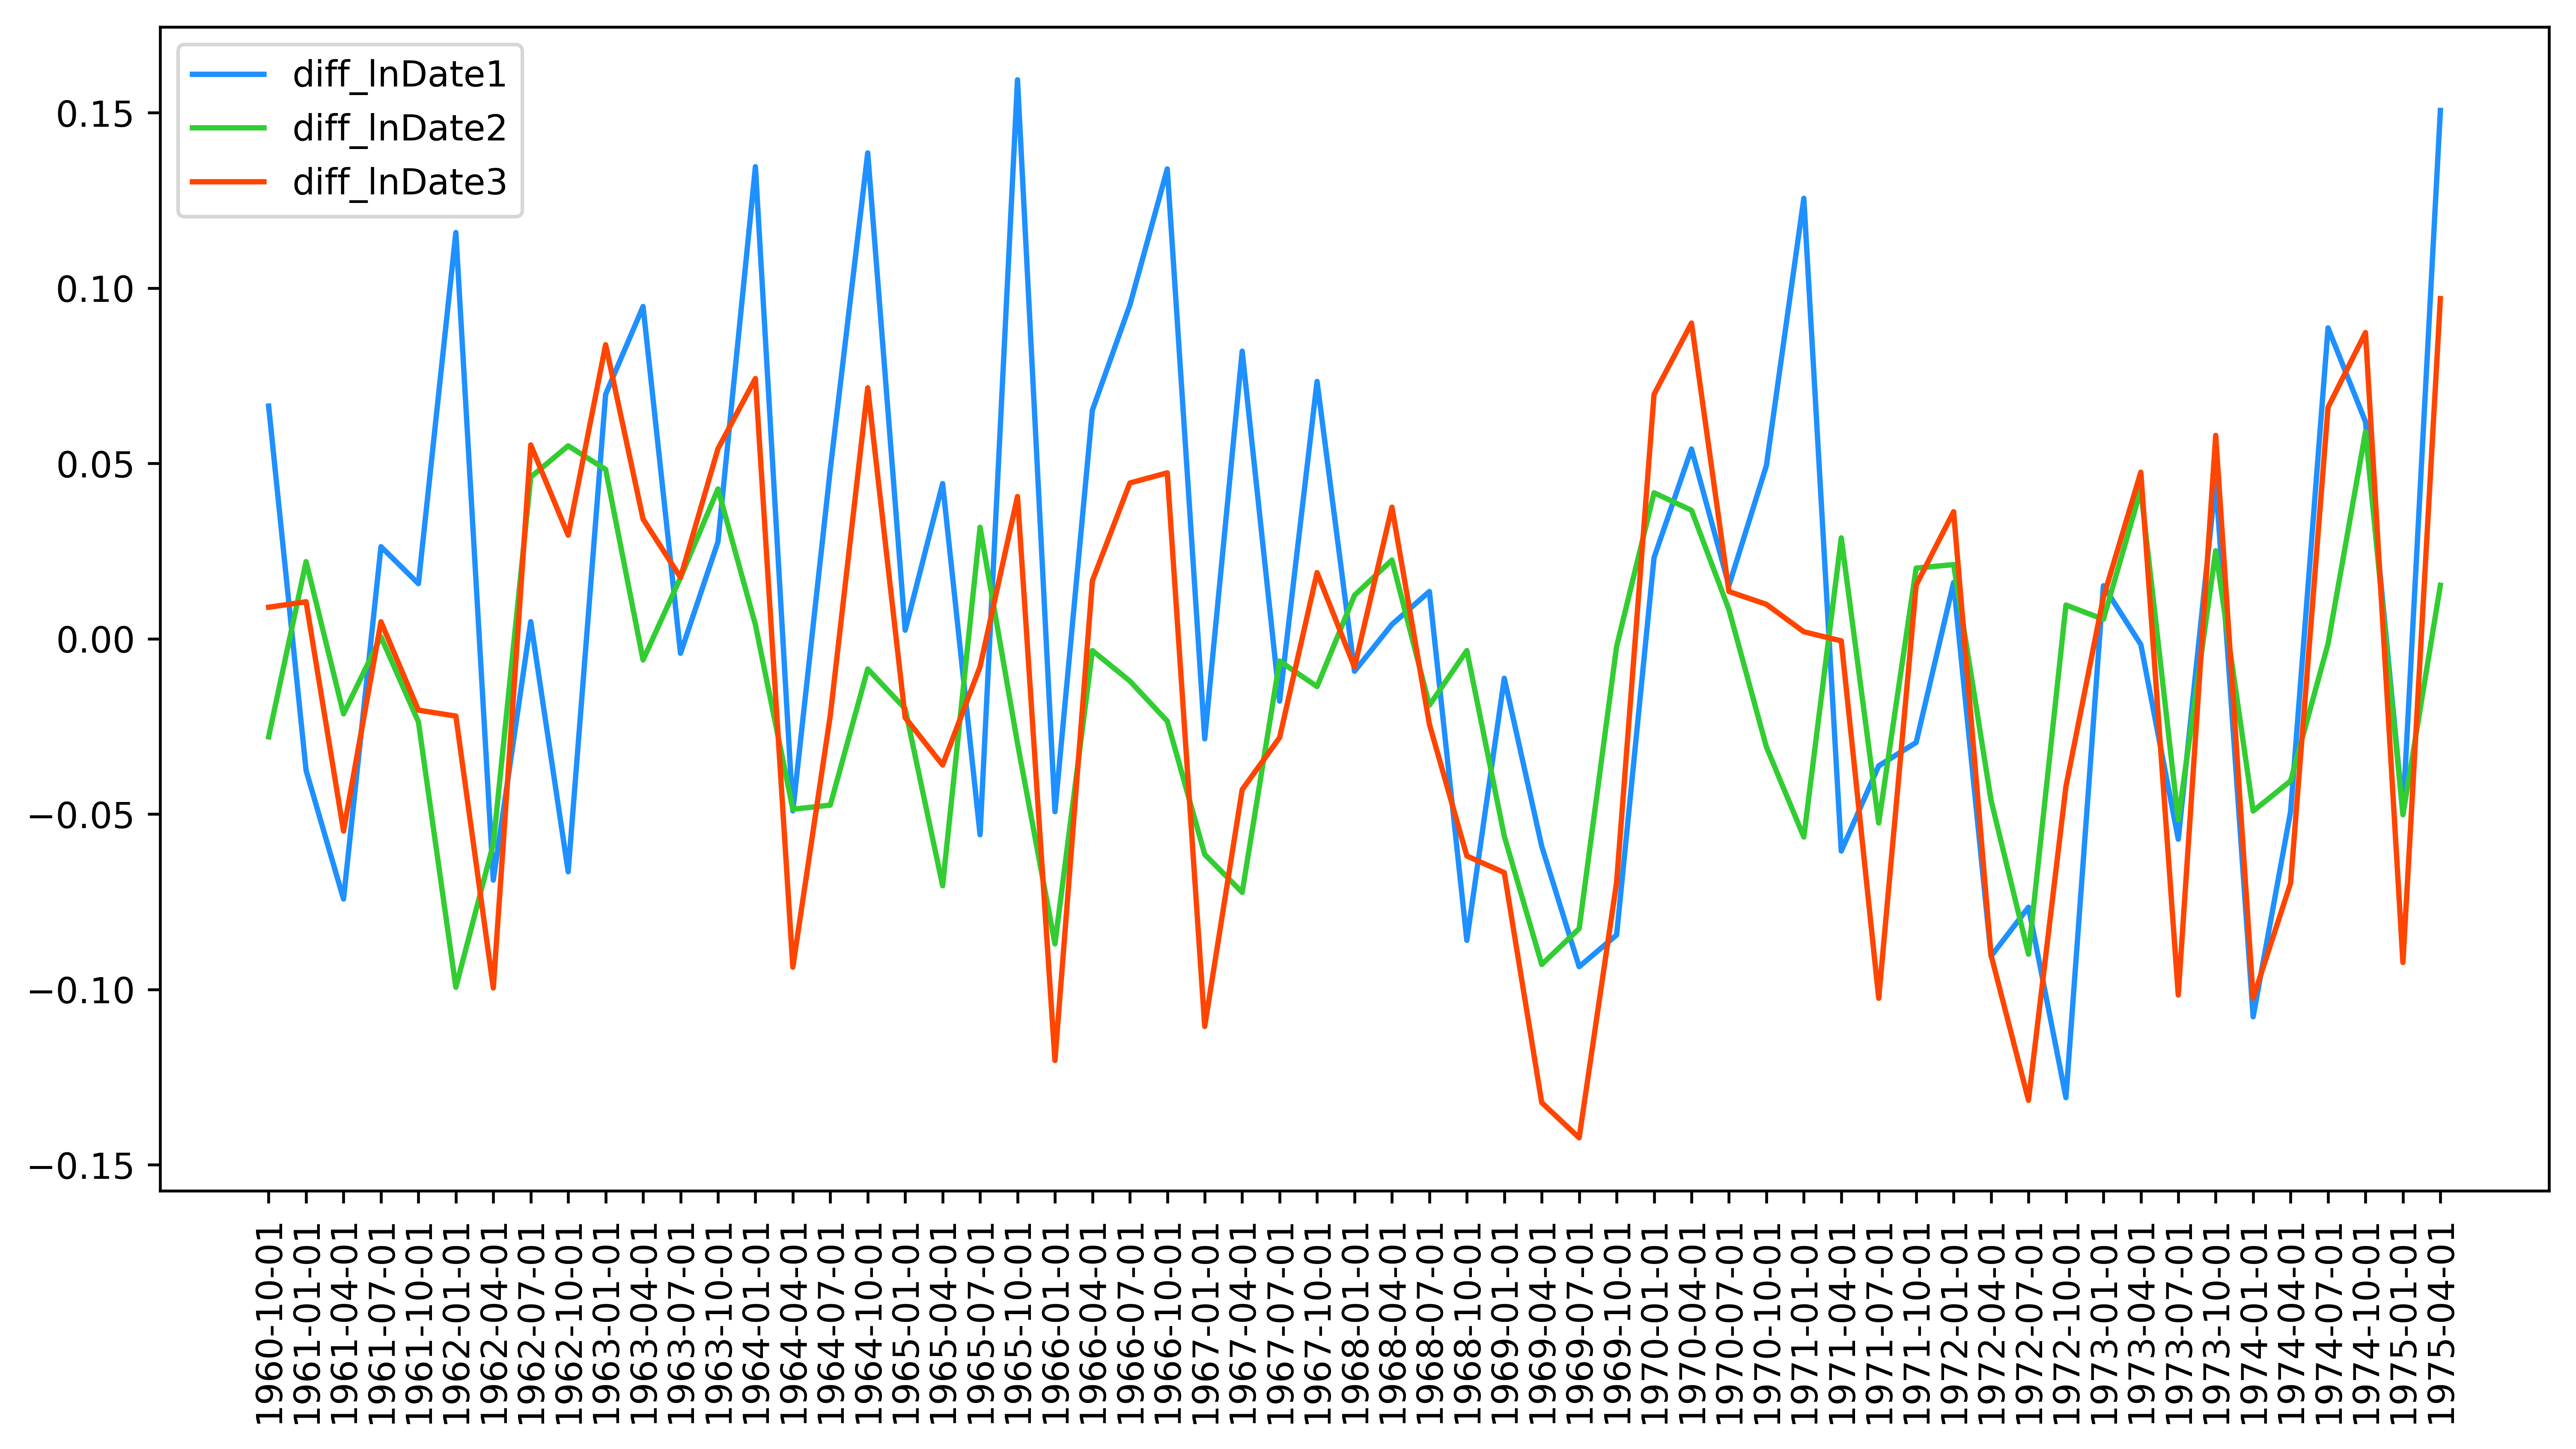

In [7]:
# 画出一阶差分图
plt.figure(figsize=(12,6),dpi=600)
plt.xticks(rotation=90)
plt.plot(data_train_diff['lnDate1'],'dodgerblue',label='diff_lnDate1')
plt.plot(data_train_diff['lnDate2'],'limegreen',label='diff_lnDate2')
plt.plot(data_train_diff['lnDate3'],'orangered',label='diff_lnDate3')
plt.legend()
plt.show()

In [8]:
# 创建VARMA模型
model_1 = sm.tsa.VARMAX(data_train_diff, order=(4,5))
res_1 = model_1.fit(maxiter=1000)
print(res_1.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,5)   Log Likelihood                 388.278
                                         + intercept   AIC                           -596.557
Date:                               Mon, 19 Oct 2020   BIC                           -409.579
Time:                                       16:36:26   HQIC                          -523.568
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):          28.38, 21.59, 21.55   Jarque-Bera (JB):     1.16, 0.01, 0.82
Prob(Q):                   0.92, 0.99, 0.99   Prob(JB):             0

In [9]:
# forecast是用来预测训练集后的时间段，pridict的预测起点必须在训练集内
# steps是预测多少个值
pred_1 = res_1.forecast(steps=10)
pred_1

,lnDate1,lnDate2,lnDate3
1975-07-01,0.045114,0.041456,0.059243
1975-10-01,0.054163,-0.086545,-0.068408
1976-01-01,-0.020012,-0.066300,-0.080620
1976-04-01,0.030585,0.011323,0.022341
1976-07-01,-0.012632,-0.028200,-0.040106
1976-10-01,0.007258,-0.019540,-0.020215
1977-01-01,0.000168,0.003355,-0.000727
1977-04-01,0.018379,-0.024346,-0.015698
1977-07-01,-0.003580,-0.023140,-0.027373
1977-10-01,0.004646,-0.015704,-0.015972


In [11]:
# 建立一个11行3列都是0的df
pred_1_real=pd.DataFrame(np.zeros((11,3)),columns= ['lnDate1', 'lnDate2', 'lnDate3']) 
# 3MS就是三个月，固定频率建立Index
pred_1_real.index=pd.date_range('1975/04/1', periods=11, freq='3MS')
# 把训练集的最后一组数据输进去，作为第一个预测值的前项结果，加上预测差分，才能得到真实预测值
pred_1_real.iloc[0,:]=data_all.iloc[59,0:3]
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.000000,0.000000,0.000000
1975-10-01,0.000000,0.000000,0.000000
1976-01-01,0.000000,0.000000,0.000000
1976-04-01,0.000000,0.000000,0.000000
...,...,...,...
1976-10-01,0.000000,0.000000,0.000000
1977-01-01,0.000000,0.000000,0.000000
1977-04-01,0.000000,0.000000,0.000000
1977-07-01,0.000000,0.000000,0.000000


In [12]:
#把预测值加上上一个的结果作为结果填入df中，原因：上一个cell已经说明
for i in range(len(pred_1)):
    pred_1_real.iloc[i+1,0]= pred_1_real.iloc[i,0]+pred_1.iloc[i,0]
    pred_1_real.iloc[i+1,1]= pred_1_real.iloc[i,1]+pred_1.iloc[i,1]
    pred_1_real.iloc[i+1,2]= pred_1_real.iloc[i,2]+pred_1.iloc[i,2]
    
pred_1_real

,lnDate1,lnDate2,lnDate3
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.665489,0.190073,0.217199
1975-10-01,0.719652,0.103528,0.148791
1976-01-01,0.699640,0.037228,0.068171
1976-04-01,0.730225,0.048551,0.090513
...,...,...,...
1976-10-01,0.724851,0.000811,0.030192
1977-01-01,0.725019,0.004166,0.029465
1977-04-01,0.743398,-0.020180,0.013767
1977-07-01,0.739819,-0.043321,-0.013606


In [35]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')

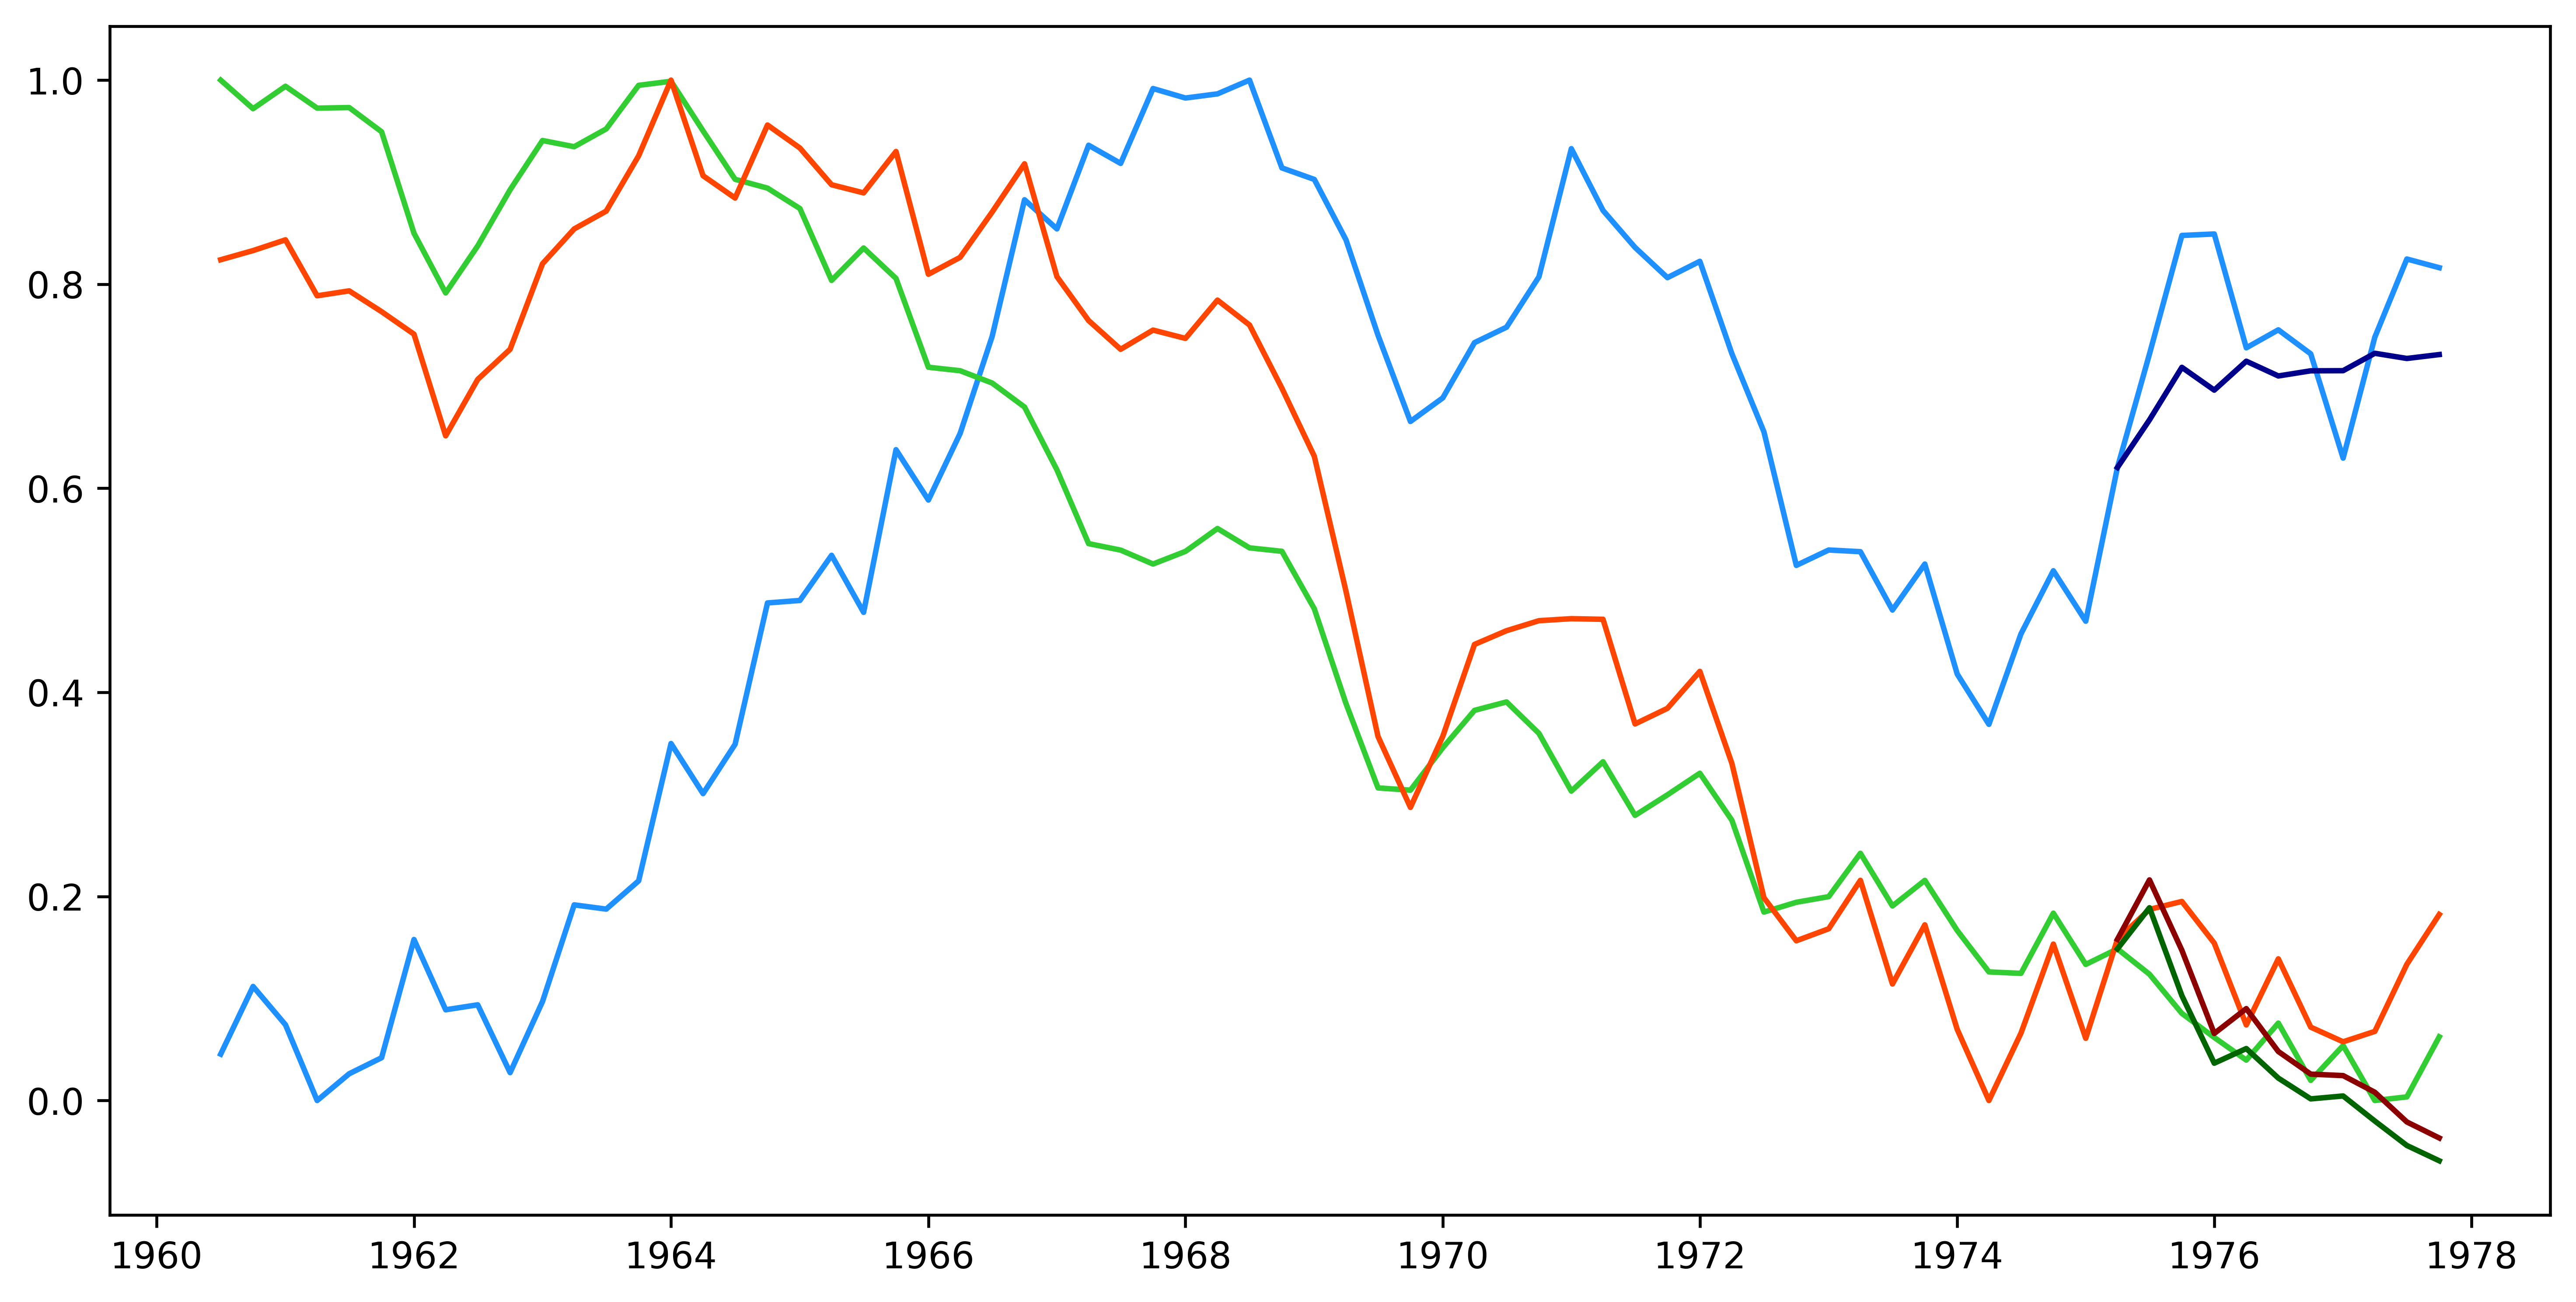

In [36]:
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_1_real['lnDate1'],'darkblue',pred_1_real['lnDate2'],'darkgreen',pred_1_real['lnDate3'],'darkred')
plt.show()

In [13]:
# tail与head类似，默认从后面取
data_actual=data_all.tail(11)
data_actual

,lnDate1,lnDate2,lnDate3
myTime,,,
1975-04-01,0.620375,0.148617,0.157956
1975-07-01,0.731584,0.123763,0.187303
1975-10-01,0.847766,0.085390,0.195090
1976-01-01,0.849229,0.061798,0.154247
1976-04-01,0.737663,0.039590,0.074057
...,...,...,...
1976-10-01,0.731735,0.019728,0.071891
1977-01-01,0.629549,0.053850,0.057567
1977-04-01,0.748059,0.000000,0.067738


In [14]:
# tail与head类似，默认从后面取
error_1=pow(data_actual['lnDate1']-pred_1_real['lnDate1'],2)
MSE1=error_1.sum()/len(pred_1_real['lnDate1'])
error_2=pow(data_actual['lnDate2']-pred_1_real['lnDate2'],2)
MSE2=error_2.sum()/len(pred_1_real['lnDate2'])
error_3=pow(data_actual['lnDate3']-pred_1_real['lnDate3'],2)
MSE3=error_3.sum()/len(pred_1_real['lnDate3'])
print(MSE1,MSE2,MSE3)

0.00601503171621905 0.002606743989875335 0.008230019544581269


## 下面是调整模型参数

In [39]:
model_2 = sm.tsa.VARMAX(data_train_diff, order=(4,4))
res_2 = model_2.fit(maxiter=1000)
print(res_2.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['lnDate1', 'lnDate2', 'lnDate3']   No. Observations:                   59
Model:                                    VARMA(4,4)   Log Likelihood                 381.738
                                         + intercept   AIC                           -601.476
Date:                               Sat, 12 Sep 2020   BIC                           -433.196
Time:                                       09:29:39   HQIC                          -535.786
Sample:                                   10-01-1960                                         
                                        - 04-01-1975                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):          26.54, 27.38, 26.27   Jarque-Bera (JB):     1.72, 0.40, 0.02
Prob(Q):                   0.95, 0.94, 0.95   Prob(JB):             0

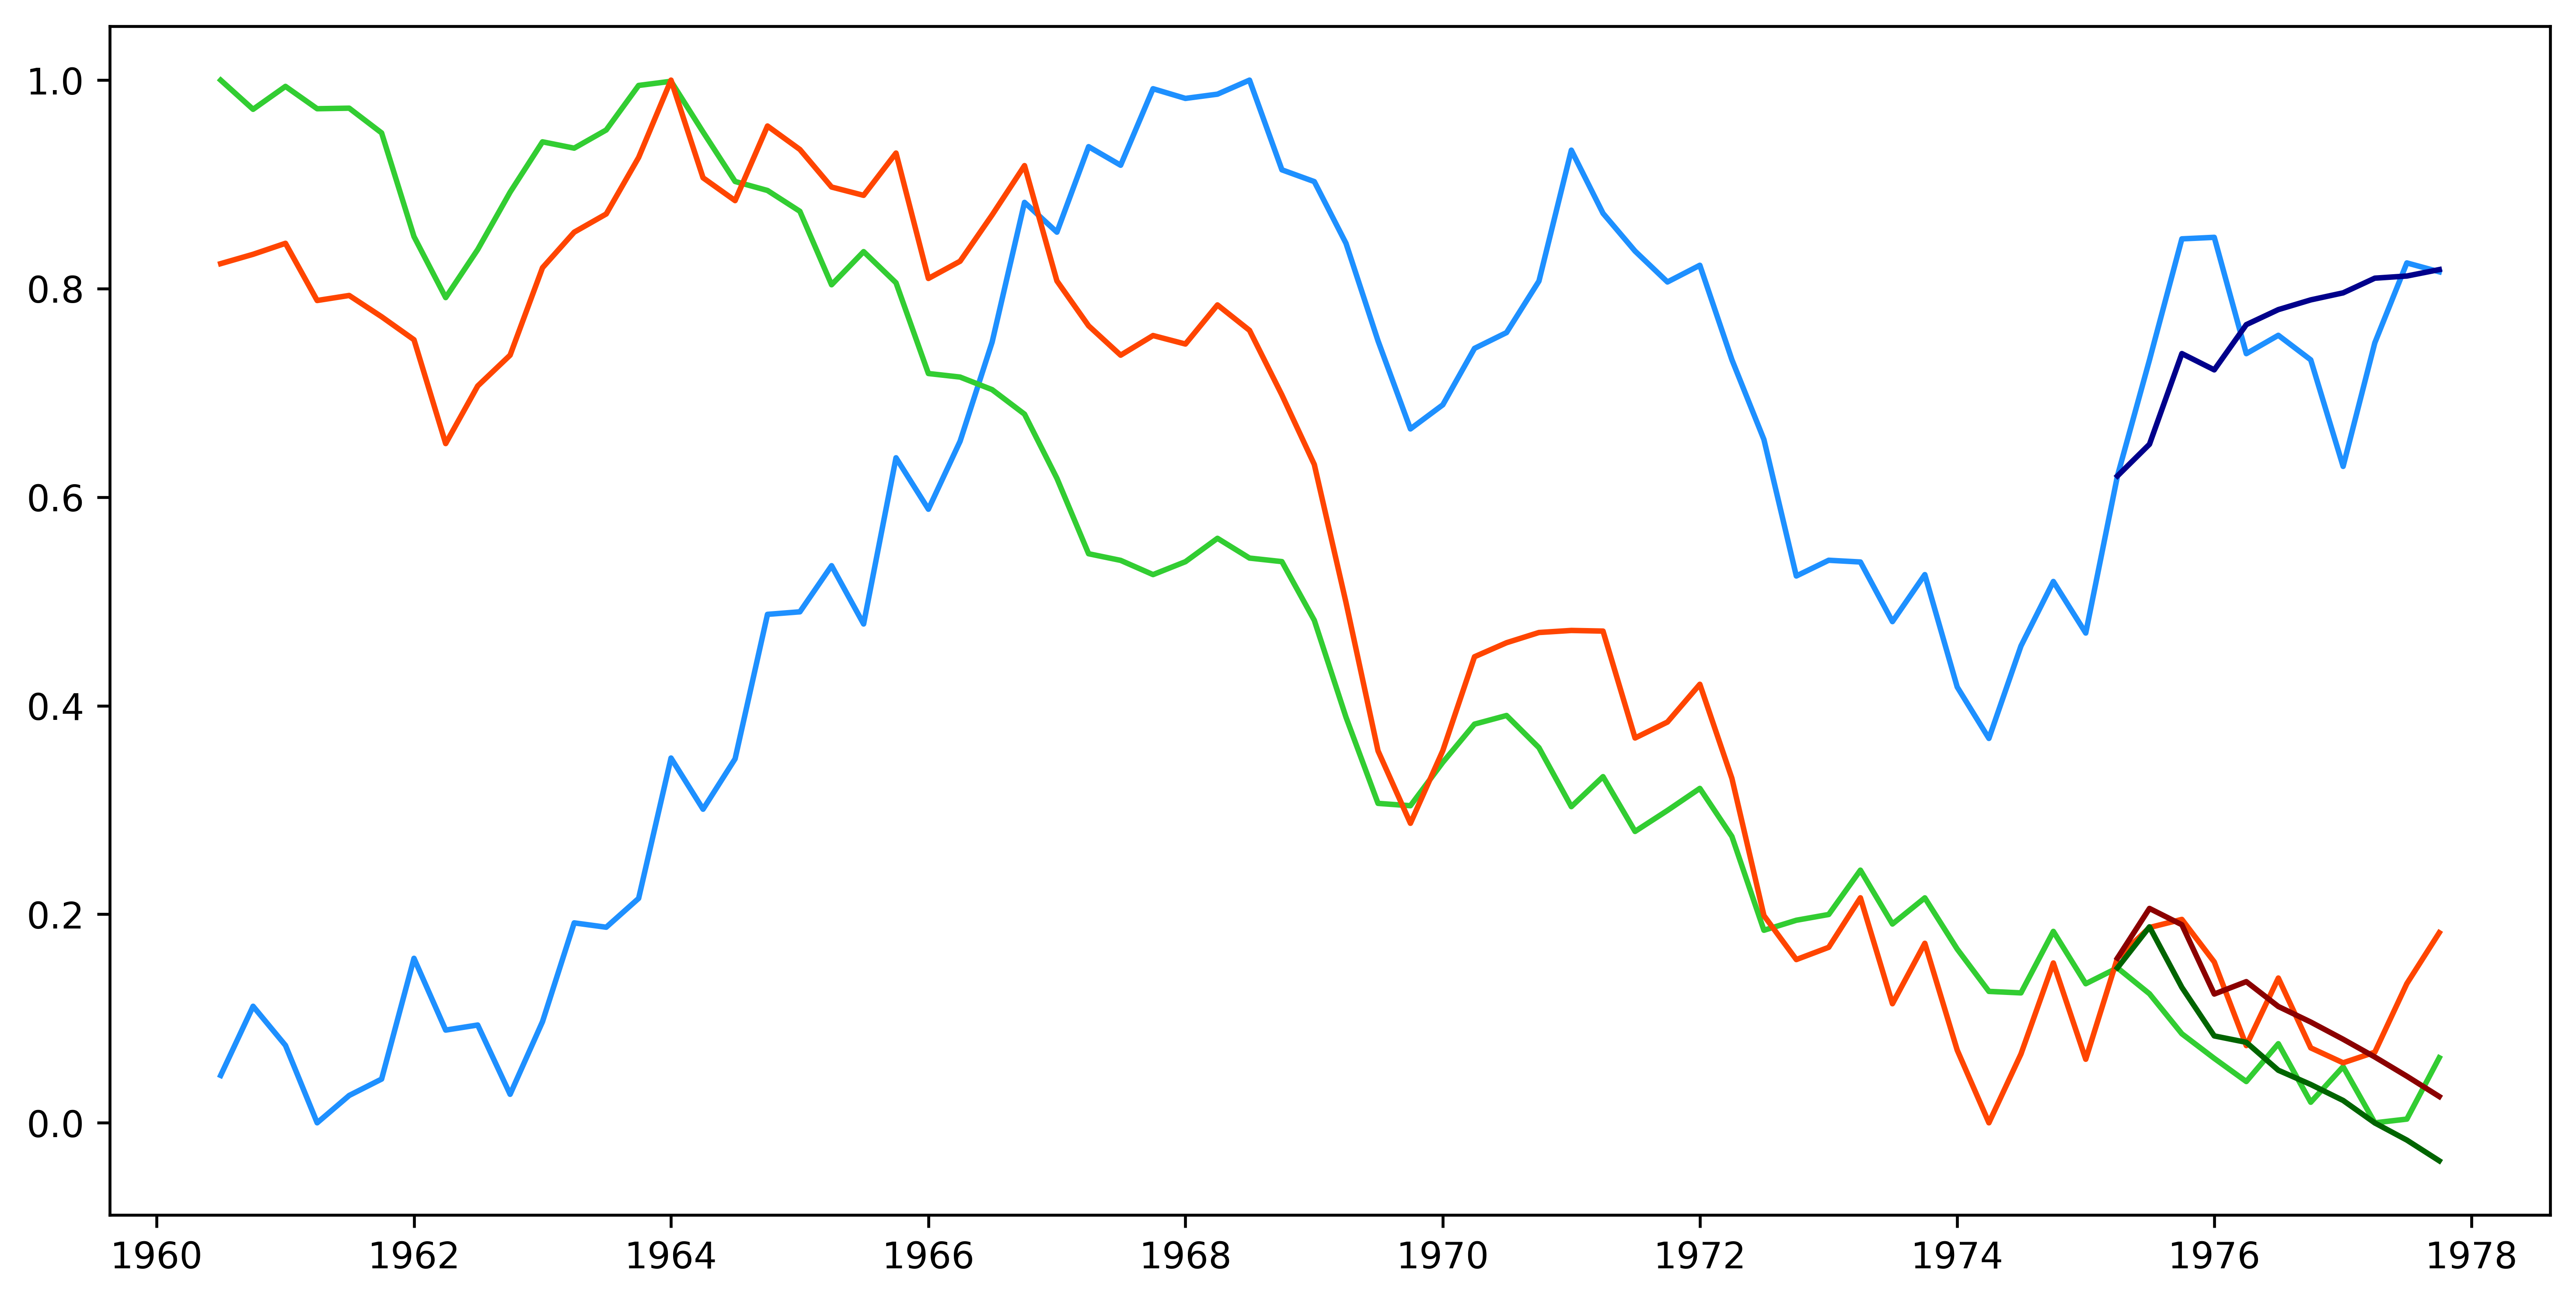

In [42]:
data_all.index=pd.date_range('1960/7/1', periods=70, freq='3MS')
plt.figure(figsize=(12,6),dpi=600)
plt.plot(data_all['lnDate1'],'dodgerblue',data_all['lnDate2'],'limegreen',data_all['lnDate3'],'orangered')
plt.plot(pred_2_real['lnDate1'],'darkblue',pred_2_real['lnDate2'],'darkgreen',pred_2_real['lnDate3'],'darkred')
plt.show()

In [43]:
error_new_1=pow(data_actual['lnDate1']-pred_2_real['lnDate1'],2)
MSE1_new=error_new_1.sum()/len(pred_2_real['lnDate1'])
error_new_2=pow(data_actual['lnDate2']-pred_2_real['lnDate2'],2)
MSE2_new=error_new_2.sum()/len(pred_2_real['lnDate2'])
error_new_3=pow(data_actual['lnDate3']-pred_2_real['lnDate3'],2)
MSE3_new=error_new_3.sum()/len(pred_2_real['lnDate3'])
print(MSE1_new,MSE2_new,MSE3_new)

0.006471216151746202 0.0018308666424864631 0.003593210124286139
